In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
from utils.preprocessor import *

In [52]:
data = np.load('preprocessed_data/Corners/2135041001_0.npy')

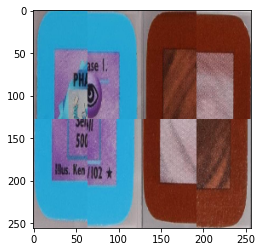

In [53]:
plt.imshow(data)

In [11]:
def pad_card(image : np.ndarray, desire_shape : tuple):
    height, width, _ = image.shape
    desire_height = desire_shape[0]
    desire_width = desire_shape[1]
    top = int((desire_height - height) / 2)
    bottom = int((desire_height - height) / 2) + ((desire_height - height) % 2)
    left = int((desire_width - width) / 2)
    right = int((desire_width - width) / 2) + ((desire_width - width) % 2)

    return cv2.copyMakeBorder(
        image, 
        top, 
        bottom, 
        left, 
        right, 
        cv2.BORDER_CONSTANT,
        None,
        value = 0
    )

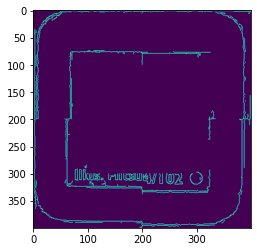

In [51]:
image = np.array(cv2.imread("data/3730009096/front.jpg"))
card =  cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
card = extract_contour_for_dim_image(image)
top_left = card[:200,:200, :]
top_right = card[:200,-200:,:]
bottom_left = card[-200:,:200,:]
bottom_right = card[-200:,-200:,:]
top = np.concatenate((top_left, top_right), axis = 1)
bottom = np.concatenate((bottom_left, bottom_right), axis = 1)
card = np.concatenate((top, bottom), axis = 0)
ed = cv2.Canny(card, 50, 150)
ed[100:300,100:300] = 0
plt.imshow(ed)

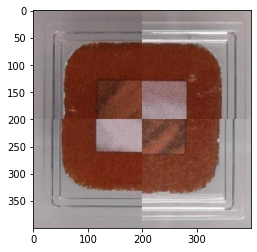

In [43]:
plt.imshow(card)

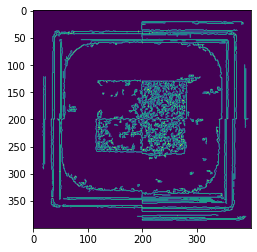

In [45]:
plt.imshow(cv2.Canny(card, 50, 150))

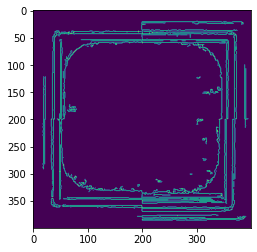